# Regresión Lineal Revisitada

![BLR](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

> Anteriormente vimos que el estimador MAP para ajustar los parámetros $w\in\mathbb{R}^{d}$ de una función lineal $f(x) = x^T w$ a un conjunto de puntos $\{(x_i, y_i)\}_{i=1}^{N}$, con $x_i\in\mathbb{R}^{d}$ y $y_i\in\mathbb{R}$, tiene la forma de mínimos cuadrados regularizados.
>
> $$
  \hat{w} = \arg \min_{w} ||y - Xw||^2 + \lambda ||w||^2
  $$

> Hoy usaremos ideas similares, y nos basaremos en la idea de previas conjugadas para estimar la distribución posterior completa, y extraer conclusiones adicionales a la estimación de los parámetros más probables.

> **Objetivos:**
> - Estudiar un enfoque Bayesiano sobre el problema de ajuste de una función lineal a un conjuto de datos.

> **Referencias:**
> 
> - Bayesian Methods for Machine Learning course, HSE University, Coursera.

___
## 1. Planteamiento inicial

Desde una perspectiva Bayesiana, podemos representar las VA objetivo $y$ y parámetros $w$, datos $X$ de un modelo lineal $y=Xw + \epsilon$ como:

![lr](figures/linear_regression.png)

Como no nos interesa modelar los datos, sino los parámetros, estudiamos la distribución posterior $P(w | X, y)$, la cual se puede reescribir como:

$$
P(w | X, y) = \frac{P(y, w | X)}{P(y | X)}.
$$

Por otra parte, usando la definición de probabilidad condicional y la factorización inducida, tenemos que:

$$
P(y, w | X) = P(y | X, w) P(w),
$$

de donde

$$
P(w | X, y) = \frac{P(y, w | X)}{P(y | X)} = \frac{P(y | X, w) P(w)}{P(y | X)}.
$$

La vez pasada, nos evitamos el problema de calcular la distribución posterior usando un estimador MAP para los parámetros. Sin embargo, como vimos, los estimadores MAP tienen algunas desventajas.

Usaremos nuestros conocimientos de distribuciones previas conjugadas para obtener la distribución posterior completa.

## 2. Previas conjugadas

Como antes, una suposición plausible es que la función de verosimilitud $P(y | X, w)$ es una distribución normal de la forma:

$$
P(y | X, w) = \mathcal{N}(y | X w, \sigma^2 I) \propto \exp\left\{-\frac{1}{2 \sigma^2} ||y - X w||^2\right\},
$$

Notemos que, para cualquier $w_0 \in \mathbb{R}^d$:

\begin{align}
||y - X w||^2 & = ||X w - y||^2 \\
              & = ||X (w - w_0) + X w_0 - y||^2 \\
              & = \left(X (w - w_0) + X w_0 - y\right)^T \left(X (w - w_0) + X w_0 - y\right) \\
              & = (w - w_0)^T X^T X (w - w_0) + 2 (w - w_0)^T X^T (X w_0 - y) + ||X w_0- y||^2 
\end{align}

En particular, haciendo $w_0 = w^* = \left(X^T X\right)^{-1} X^T y$ (solución de mínimos cuadrados), se observa que:

\begin{array}
2 (w - w^*)^T X^T (X w^* - y) & = 2 (Xw - Xw^*)^T  (X w^* - y) \\
                              & = 2 \left[w^T X^T X w^* - w^T X^Ty - (w^*)^T X^T X w^* + (w^*)^T X^T y \right]\\
                              & = 2 \left[w^T \underbrace{X^T X \left(X^T X\right)^{-1}}_{I} X^T y - w^T X^Ty - y^T X \underbrace{\left(X^T X\right)^{-1} X^T X}_{I} \left(X^T X\right)^{-1} X^T y + y^T X \left(X^T X\right)^{-1} X^T y\right] \\
                              & = 2 \left[w^T X^T y - w^T X^Ty - y^T X  \left(X^T X\right)^{-1} X^T y + y^T X \left(X^T X\right)^{-1} X^T y\right] \\
                              & = 0.
\end{array}

De esta manera: 

$$
||y - X w||^2 = (w - w^*)^T X^T X (w - w^*) + \underbrace{||X w^*- y||^2 }_{f(X, y)}
$$

Así, concluimos que

\begin{align}
P(y | X, w) & = \mathcal{N}(y | X w, \sigma^2 I) \\
            & \propto \exp\left\{-\frac{1}{2 \sigma^2} ||y - X w||^2\right\} \\
            & \propto \exp\left\{-\frac{1}{2 \sigma^2} (w - w^*)^T X^T X (w - w^*)\right\} \\
            & \propto \mathcal{N}\left(w | w^*, \sigma^2 \left(X^T X\right)^{-1}\right)
\end{align}

Retomando la distribución posterior, sabemos que

$$
P(w | X, y) \propto P(y | X, w) P(w) \propto \mathcal{N}\left(w | w^*, \sigma^2 \left(X^T X\right)^{-1}\right) P(w).
$$

¿Qué elecciones de la distribución previa $P(w)$ son conjugadas?

1. 
2. 

## 3. Previa normal

Como vimos en la tarea, el producto de dos densidades normales univariadas es otra densidad normal univariada. Esto se extiende al caso multivariable con:

$$
\mu_3 = \Sigma_2 \left(\Sigma_1 + \Sigma_2\right)^{-1} \mu_1 + \Sigma_1 \left(\Sigma_1 + \Sigma_2\right)^{-1} \mu_2, \qquad \Sigma_3 = \Sigma_1 \left(\Sigma_1 + \Sigma_2\right)^{-1} \Sigma_2,
$$

o equivalentemente

$$
\Sigma_3^{-1} = \Sigma_1^{-1} + \Sigma_2^{-1} , \qquad
\mu_3 = \Sigma_2 \Sigma_3^{-1} \mu_1 + \Sigma_1 \Sigma_3^{-1}\mu_2
$$

De manera que una previa conjugada para el caso anterior es:

$$
P(w) = \mathcal{N}(w | 0, \gamma^2 I),
$$

con lo cual:

$$
P(w | X, y) = \mathcal{N}\left(w | w^{**}, \Sigma^{*}\right).
$$

con

$$
\left(\Sigma^{*}\right)^{-1} = \frac{1}{\sigma^2} X^T X + \frac{1}{\gamma^2}I, \qquad w^{**} = \left(\frac{1}{\sigma^2} X^T X + \frac{1}{\gamma^2}I \right)^{-1}\frac{1}{\sigma^2} X^T X w^{*} = \left(X^T X + \frac{\sigma^2}{\gamma^2}I \right)^{-1} X^T y = w^{*}_{reg}, 
$$


___

> **Comentario:** Para todo este análisis hemos supuesto los parámetros $\sigma^2$ y $\gamma^2$ como valores deterministas conocidos. De no ser cierto esto, tendríamos que modelarlos como VA adicionales, y esto aumentaría un poco la complejidad del problema.
> 
> En particular, la suposición sobre $\sigma^2$ es la más fuerte, dado que $\gamma^2$ lo podemos interpretar como la incertidumbre que tenemos de que $w$ está cercano a cero.
___

**Ejemplo:**

In [71]:
# Importar numpy 
import numpy as np
# Importar scipy.stats
from scipy import stats
# Importar matplotlib
from matplotlib import pyplot as plt
# Importar mpl_toolkits.mplot3d
from mpl_toolkits import mplot3d

In [72]:
# Fijar semilla para reproducibilidad
np.random.seed(1001)
# Dispersión de los datos
sigma = 2
# Generar datos
N = 100
x = np.linspace(0, 10, N)
y = 2 * x + 5 + np.random.normal(loc=0, scale=sigma, size=N)

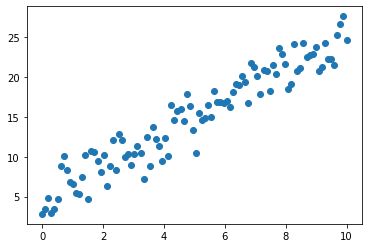

In [73]:
# Graficar
plt.plot(x, y, 'o')

En este caso, tenemos que el modelo es:

$$
y = [1\quad x] \left[\begin{array}{c} w_0 \\ w_1\end{array} \right] + \epsilon
$$

In [74]:
# Construimos X
X = np.concatenate((np.ones((N, 1)), x.reshape((N, 1))), axis=1)
X[:10]

array([[1.        , 0.        ],
       [1.        , 0.1010101 ],
       [1.        , 0.2020202 ],
       [1.        , 0.3030303 ],
       [1.        , 0.4040404 ],
       [1.        , 0.50505051],
       [1.        , 0.60606061],
       [1.        , 0.70707071],
       [1.        , 0.80808081],
       [1.        , 0.90909091]])

De los datos, un valor plausible para $\gamma$ es: $\gamma=10$

In [75]:
# Gamma
gamma = 10
# Distribución posterior
l = sigma**2 / gamma**2
w_reg = np.linalg.inv(X.T.dot(X) + l * np.eye(2)).dot(X.T.dot(y))
Sigma = np.linalg.inv(X.T.dot(X) / sigma**2 + np.eye(2) / gamma**2)
posterior = stats.multivariate_normal(mean=w_reg, cov=Sigma)

In [76]:
posterior.mean, posterior.cov

(array([4.66343004, 2.064308  ]),
 array([[ 0.15737018, -0.02348663],
        [-0.02348663,  0.0046992 ]]))

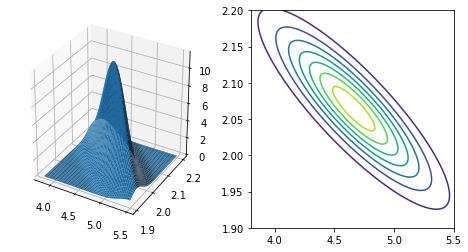

In [63]:
# Gráfico
w0 = np.linspace(3.8, 5.5, 100)
w1 = np.linspace(1.9, 2.2, 100)
w0, w1 = np.meshgrid(w0, w1)
z = posterior.pdf(np.dstack([w0, w1]))
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(w0, w1, z)
ax2 = fig.add_subplot(122)
ax2.contour(w0, w1, z)
plt.show()

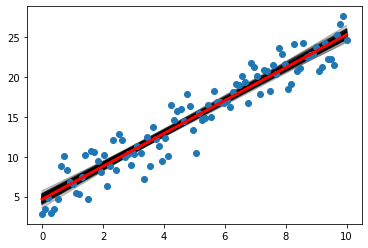

In [64]:
# Parámetros más probables y diferentes posibilidades
for i in range(100):
    wp = posterior.rvs()
    plt.plot(x, X.dot(wp), 'k', alpha=0.3)
plt.plot(x, y, 'o')
plt.plot(x, X.dot(posterior.mean), 'r', lw=3)

#### ¿Qué pasa si el valor que usamos para $\sigma$ se desvía del valor real?

In [65]:
# Gamma y sigma
gamma = 10
sigma = 10
# Distribución posterior
l = sigma**2 / gamma**2
w_reg = np.linalg.inv(X.T.dot(X) + l * np.eye(2)).dot(X.T.dot(y))
Sigma = np.linalg.inv(X.T.dot(X) / sigma**2 + np.eye(2) / gamma**2)
posterior = stats.multivariate_normal(mean=w_reg, cov=Sigma)

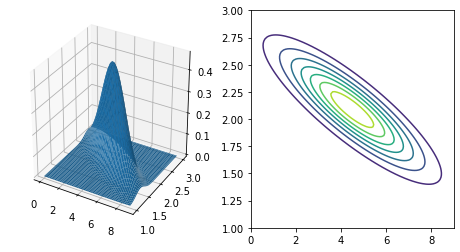

In [66]:
# Gráfico
w0 = np.linspace(0, 9, 100)
w1 = np.linspace(1, 3, 100)
w0, w1 = np.meshgrid(w0, w1)
z = posterior.pdf(np.dstack([w0, w1]))
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(w0, w1, z)
ax2 = fig.add_subplot(122)
ax2.contour(w0, w1, z)
plt.show()

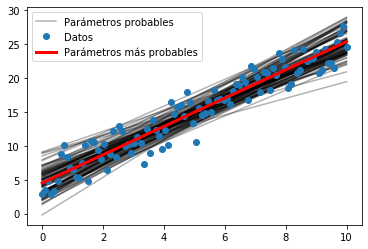

In [69]:
# Parámetros más probables y diferentes posibilidades
for i in range(100):
    wp = posterior.rvs()
    plt.plot(x, X.dot(wp), 'k', alpha=0.3)
plt.plot(x, X.dot(wp), 'k', alpha=0.3, label="Parámetros probables")
plt.plot(x, y, 'o', label="Datos")
plt.plot(x, X.dot(posterior.mean), 'r', lw=3, label="Parámetros más probables")
plt.legend()

### Aprendizaje en línea

Este esquema que acabamos de ver es susceptible para aprendizaje en línea. Dado que la distribución posterior es normal cuando la previa es normal (previa conjugada), podemos usar esta distribución posterior para el siguiente paso. La nueva previa para el siguiente paso sería:

$$
P_{k+1}(w) = P_{k}(w | X, y) = \mathcal{N}\left(w | \mu_k, \Sigma_k\right).
$$

**Tarea.** Dado que la función de verosimilitud satisface:

$$
P(y | X, w) \propto \mathcal{N}\left(w | w^*, \sigma^2 \left(X^T X\right)^{-1}\right),
$$

¿Cuál sería la distribución posterior con una previa normal $P(w)  = \mathcal{N}\left(w | \mu, \Sigma\right)$?

## 4. Previa uniforme

**Tarea**

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>